In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [75]:
pd.set_option('display.max_columns',500) 
#출력시 생략 X

In [76]:
#from jupyterthemes import jtplot

#jtplot.style(theme='grade3')

In [77]:
#df=pd.read_csv("BG_sample2.csv")
df=pd.read_excel("BG_sample18.xlsx")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   색인                          1474 non-null   int64  
 1   타임스탬프(YYYY-MM-DDThh:mm:ss)  1464 non-null   object 
 2   이벤트 유형                      1474 non-null   object 
 3   이벤트 하위 유형                   175 non-null    object 
 4   환자 정보                       3 non-null      object 
 5   장치 정보                       1 non-null      object 
 6   소스 장치 ID                    1471 non-null   object 
 7   포도당 값 (mg/dL)               1429 non-null   object 
 8   인슐린 값(u)                    21 non-null     float64
 9   탄수화물 값 (그램)                 17 non-null     float64
 10  기간(hh:mm:ss)                1 non-null      object 
 11  포도당 변화율 (mg/dL/min)         2 non-null      float64
 12  트랜스미터 시간 (배장 정수)            1422 non-null   float64
 13  트랜스미터 ID                    1426 

In [79]:
df.shape

(1474, 14)

In [80]:
df.head(13)

,색인,타임스탬프(YYYY-MM-DDThh:mm:ss),이벤트 유형,이벤트 하위 유형,환자 정보,장치 정보,소스 장치 ID,포도당 값 (mg/dL),인슐린 값(u),탄수화물 값 (그램),기간(hh:mm:ss),포도당 변화율 (mg/dL/min),트랜스미터 시간 (배장 정수),트랜스미터 ID
0,1,NaN,이름,NaN,sch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,성,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,생년월일,NaN,1983-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,장치,NaN,NaN,Dexcom G5 Mobile App,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,경고,하락,NaN,NaN,Android,NaN,NaN,NaN,NaN,3.0,NaN,NaN
5,6,NaN,경고,높음,NaN,NaN,Android,250,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,경고,낮음,NaN,NaN,Android,70,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,경고,신호 손실,NaN,NaN,Android,NaN,NaN,NaN,00:30:00,NaN,NaN,NaN
8,9,NaN,경고,상승,NaN,NaN,Android,NaN,NaN,NaN,NaN,3.0,NaN,NaN
9,10,NaN,경고,긴급하게 낮음,NaN,NaN,Android,55,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#필요없는 열 제거
cols = ['색인', '이벤트 하위 유형', '환자 정보', '장치 정보', '소스 장치 ID', '인슐린 값(u)', '탄수화물 값 (그램)', '기간(hh:mm:ss)', '포도당 변화율 (mg/dL/min)', '트랜스미터 시간 (배장 정수)', '트랜스미터 ID']
df.drop(cols, axis=1, inplace=True)


In [82]:
df=df.rename({'타임스탬프(YYYY-MM-DDThh:mm:ss)':'Timestamp','포도당 값 (mg/dL)':'Glucose','이벤트 유형':'Event'},axis='columns')

In [83]:
df.head(13)

,Timestamp,Event,Glucose
0,NaN,이름,NaN
1,NaN,성,NaN
2,NaN,생년월일,NaN
3,NaN,장치,NaN
4,NaN,경고,NaN
5,NaN,경고,250
6,NaN,경고,70
7,NaN,경고,NaN
8,NaN,경고,NaN
9,NaN,경고,55


In [84]:
df['Event'].value_counts()

EGV     1422
인슐린       21
탄수화물      17
경고         6
교정         4
이름         1
생년월일       1
성          1
장치         1
Name: Event, dtype: int64

In [85]:
df['Glucose'].value_counts()

높음     169
199     27
187     20
185     19
203     18
      ... 
285      1
284      1
279      1
272      1
55       1
Name: Glucose, Length: 242, dtype: int64

In [86]:
df.tail()

,Timestamp,Event,Glucose
1469,2020-03-18T09:20:43,EGV,높음
1470,2020-03-18T09:25:44,EGV,높음
1471,2020-03-18T09:30:43,EGV,높음
1472,2020-03-18T09:35:44,EGV,높음
1473,2020-03-18T09:40:44,EGV,높음


In [87]:
#df_sample = df.loc[[24,25],:]
#df_sample.columns=['Timestamp','Event','Glucose']
#df_sample.

In [88]:
df['Glucose'].value_counts()

높음     169
199     27
187     20
185     19
203     18
      ... 
285      1
284      1
279      1
272      1
55       1
Name: Glucose, Length: 242, dtype: int64

In [89]:
df.shape

(1474, 3)

In [90]:
# 혈당 '높음' 빈도 카운트
def glucose_count_high(df,col):
    count=0
    for i, row in df.iterrows():
         val = row[col]
         if val=='높음':
            count=count+1
    print('높음 : ',count)

In [91]:
# 혈당 '낮음' 빈도 카운트
def glucose_count_low(df,col):
    count=0
    for i, row in df.iterrows():
         val = row[col]
         if val=='낮음':
            count=count+1
    print('낮음 : ',count)

In [92]:
glucose_count_high(df,'Glucose')

높음 :  169


In [93]:
glucose_count_low(df,'Glucose')

낮음 :  0


In [94]:
if df['Glucose'][24] is None:
    print("empty")

In [95]:
print(df['Glucose'][24])

nan


In [96]:
#if math.isnan(df['Glucose'][26]):
#    print('empty')
#else:
#    print('no')

In [97]:
#interpolate_glucose(df,'Glucose')

In [100]:
df.isnull().sum()

Timestamp    10
Event         0
Glucose      45
dtype: int64

In [101]:
df['Event'].value_counts()

EGV     1422
인슐린       21
탄수화물      17
경고         6
교정         4
이름         1
생년월일       1
성          1
장치         1
Name: Event, dtype: int64

In [102]:
def fix_glucose(df,col):
    for i, row in df.iterrows():
        val = row[col]
        if val=='높음':
            df.loc[i,col] = 400

In [103]:
def fix_glucose_low(df,col):
    for i, row in df.iterrows():
        val = row[col]
        if val=='낮음':
            df.loc[i,col] = 60

In [104]:
df['Glucose'].value_counts()

높음     169
199     27
187     20
185     19
203     18
      ... 
285      1
284      1
279      1
272      1
55       1
Name: Glucose, Length: 242, dtype: int64

In [105]:
df.head(50)

,Timestamp,Event,Glucose
0,NaN,이름,NaN
1,NaN,성,NaN
2,NaN,생년월일,NaN
3,NaN,장치,NaN
4,NaN,경고,NaN
5,NaN,경고,250
6,NaN,경고,70
7,NaN,경고,NaN
8,NaN,경고,NaN
9,NaN,경고,55


In [106]:
fix_glucose(df,'Glucose')

In [107]:
fix_glucose_low(df,'Glucose')

In [108]:
len(df['Timestamp'])

1474

In [109]:
df.isnull().sum()

Timestamp    10
Event         0
Glucose      45
dtype: int64

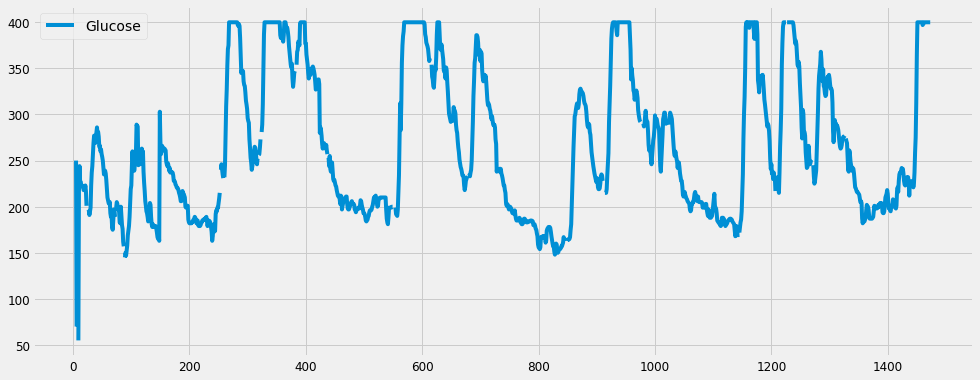

In [110]:
df.plot(figsize=(15,6))
plt.show()

In [111]:
df.head(15)

,Timestamp,Event,Glucose
0,NaN,이름,NaN
1,NaN,성,NaN
2,NaN,생년월일,NaN
3,NaN,장치,NaN
4,NaN,경고,NaN
5,NaN,경고,250
6,NaN,경고,70
7,NaN,경고,NaN
8,NaN,경고,NaN
9,NaN,경고,55


In [112]:
df.head(25)

,Timestamp,Event,Glucose
0,NaN,이름,NaN
1,NaN,성,NaN
2,NaN,생년월일,NaN
3,NaN,장치,NaN
4,NaN,경고,NaN
5,NaN,경고,250
6,NaN,경고,70
7,NaN,경고,NaN
8,NaN,경고,NaN
9,NaN,경고,55


In [113]:
df=df.drop(df.index[:10,]) 

In [39]:
df.tail()

,Timestamp,Event,Glucose
1469,2020-03-18T09:20:43,EGV,400
1470,2020-03-18T09:25:44,EGV,400
1471,2020-03-18T09:30:43,EGV,400
1472,2020-03-18T09:35:44,EGV,400
1473,2020-03-18T09:40:44,EGV,400


In [114]:
df.isnull().sum()

Timestamp     0
Event         0
Glucose      38
dtype: int64

In [40]:
#df=df.drop(df.index[365]) 

In [41]:
#df.tail()

In [42]:
df.head()

,Timestamp,Event,Glucose
10,2020-03-13T11:05:03,교정,216
11,2020-03-13T11:14:06,교정,244
12,2020-03-13T11:15:55,EGV,227
13,2020-03-13T11:20:50,EGV,227
14,2020-03-13T11:25:49,EGV,224


# 끝나고 결과정리 파트


In [74]:
df.isnull().sum()

Timestamp    0
Event        0
Glucose      0
dtype: int64

In [44]:
df['Event'].value_counts()

EGV     1422
인슐린       21
탄수화물      17
교정         4
Name: Event, dtype: int64

In [45]:
df['Glucose'].value_counts()

400    169
199     27
187     20
185     19
197     18
      ... 
171      1
169      1
389      1
366      1
145      1
Name: Glucose, Length: 240, dtype: int64

In [46]:
df['Glucose'].unique()

array([216, 244, 227, 224, 223, 222, 218, 217, 201, nan, 197, 196, 191,
       195, 199, 237, 257, 269, 277, 274, 275, 280, 286, 279, 281, 276,
       265, 266, 260, 262, 254, 250, 243, 235, 238, 239, 236, 229, 219,
       210, 207, 204, 203, 205, 193, 189, 178, 175, 185, 198, 183, 182,
       200, 190, 180, 176, 162, 157, 145, 150, 147, 153, 158, 169, 174,
       179, 247, 253, 246, 248, 289, 287, 245, 261, 256, 249, 263, 259,
       226, 206, 184, 186, 187, 202, 181, 172, 167, 165, 163, 303, 271,
       264, 242, 234, 228, 221, 220, 215, 213, 214, 212, 188, 173, 168,
       192, 209, 240, 231, 232, 309, 327, 353, 371, 375, 400, 397, 396,
       398, 383, 364, 345, 348, 347, 336, 332, 331, 324, 315, 311, 306,
       296, 293, 291, 273, 251, 252, 349, 387, 386, 384, 382, 379, 393,
       394, 390, 374, 367, 360, 354, 351, 355, 339, 330, 368, 370, 377,
       399, 365, 359, 343, 346, 352, 350, 328, 337, 338, 333, 283, 268,
       267, 255, 241, 230, 211, 208, 194, 312, 356, 385, 378, 37

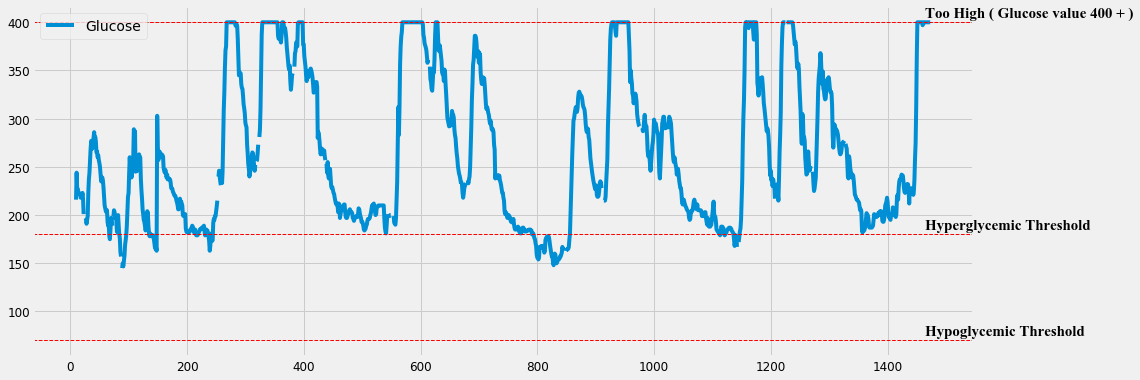

In [47]:
df.plot(figsize=(15,6))
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
#plt.annotate(df['Timestamp'][13],xy=(-50,40),xytext=(-50,0),fontsize=20,bbox=dict(boxstyle='square',
#                                                               color='white'),arrowprops=dict(facecolor='black'))
#plt.annotate(df['Timestamp'][len(df['Timestamp'])],xytext=(-,0),fontsize=20,bbox=dict(boxstyle='square',
 #                                                              color='white'))
plt.text(len(df['Timestamp']),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)

#y=70
#plt.plot(y,'b--',linestyles='--'),
#plt.hlines(70,linestyles='--')
plt.show()

In [48]:
insul=list()

In [49]:
# 인슐린, 탄수화물 투여시 혈당값 NULL
# 그래서 t시점에 t-2 , t-1 크기비교해서 upper면 이렇게 lower면 이렇게 해서 interpolation ( 보간)
# 이거 위에 참고사항 drop하고 나서 적용 해줘야됨
import math
def interpolate_glucose(df,col):
    #insul=list()
    
    for i, row in df.iterrows():
        val=row[col]
        if math.isnan(val):
            if df['Glucose'][i-2] >= df['Glucose'][i-1]:
                c = (df['Glucose'][i-2] - df['Glucose'][i-1]) / 2 
                df.loc[i,col]= df['Glucose'][i-1] - c
                insul.append(i)
                print(insul)
                
            if df['Glucose'][i-2] < df['Glucose'][i-1]:
                c = (df['Glucose'][i-2] - df['Glucose'][i-1]) / 2 
                df.loc[i,col]= df['Glucose'][i-1] - c
                insul.append(i)
                print(insul)
        
           

In [50]:
interpolate_glucose(df,'Glucose')

[24]
[24, 25]
[24, 25, 73]
[24, 25, 73, 88]
[24, 25, 73, 88, 253]
[24, 25, 73, 88, 253, 259]
[24, 25, 73, 88, 253, 259, 318]
[24, 25, 73, 88, 253, 259, 318, 323]
[24, 25, 73, 88, 253, 259, 318, 323, 382]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552, 553]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552, 553, 614]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552, 553, 614, 615]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552, 553, 614, 615, 679]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552, 553, 614, 615, 679, 680]
[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552, 553, 614, 615, 679, 680, 730]
[24,

In [51]:
print(insul)

[24, 25, 73, 88, 253, 259, 318, 323, 382, 383, 438, 550, 551, 552, 553, 614, 615, 679, 680, 730, 847, 848, 911, 913, 976, 977, 978, 979, 1143, 1144, 1208, 1209, 1226, 1270, 1271, 1327, 1439, 1441]


In [52]:
print(len(insul))

38


In [53]:
#df['Glucose'][insul[37]]

In [54]:
glucose_value=list()

In [55]:
for i in range(0,len(insul)):
    glucose_value.append(df['Glucose'][insul[i]])

In [56]:
glucose_value

[193.0,
 189.0,
 185.0,
 154.5,
 218.0,
 229.0,
 255.0,
 277.5,
 348.0,
 348.5,
 255.0,
 200.0,
 200.0,
 200.0,
 200.0,
 362.5,
 363.25,
 233.5,
 233.75,
 245.5,
 162.0,
 161.5,
 225.0,
 216.0,
 291.5,
 291.25,
 291.125,
 291.0625,
 161.5,
 158.75,
 210.0,
 206.5,
 400.0,
 251.5,
 251.75,
 277.5,
 233.0,
 225.5]

In [57]:
print(len(glucose_value))

38


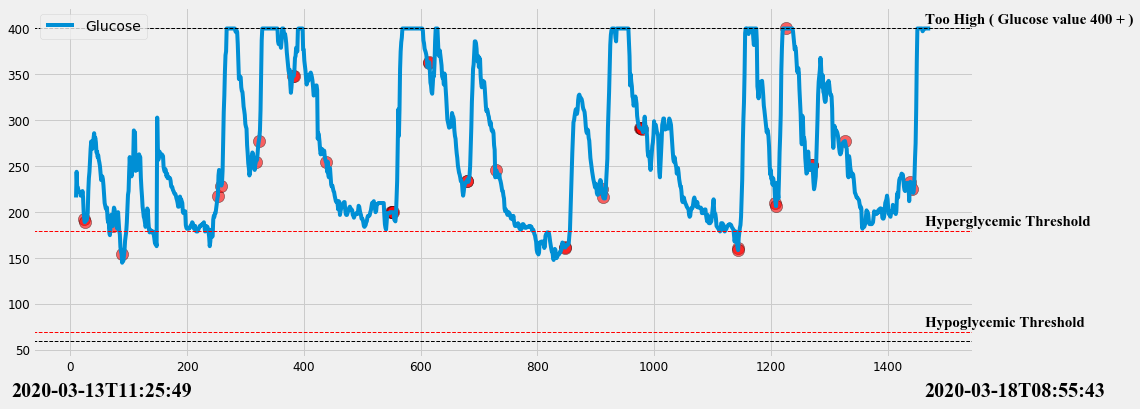

In [73]:
df.plot(figsize=(15,6))
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='black',linestyle='--',linewidth=1)
plt.axhline(y=60,c='black',linestyle='--',linewidth=1)
plt.text(len(df['Timestamp']),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.scatter(insul,glucose_value,c='red',edgecolor='black',s=150)
plt.text(len(df['Timestamp']),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),60,'',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),-1,df['Timestamp'][len(df['Timestamp'])],family='Times New Roman',
         fontweight='bold',size=20)
plt.text(-100,-1,df['Timestamp'][14],family='Times New Roman',
         fontweight='bold',size=20)

#y=70
#plt.plot(y,'b--',linestyles='--'),
#plt.hlines(70,linestyles='--')
plt.show()

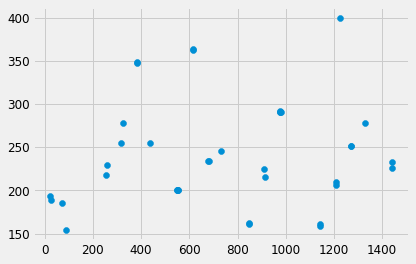

In [59]:
plt.scatter(insul,glucose_value)

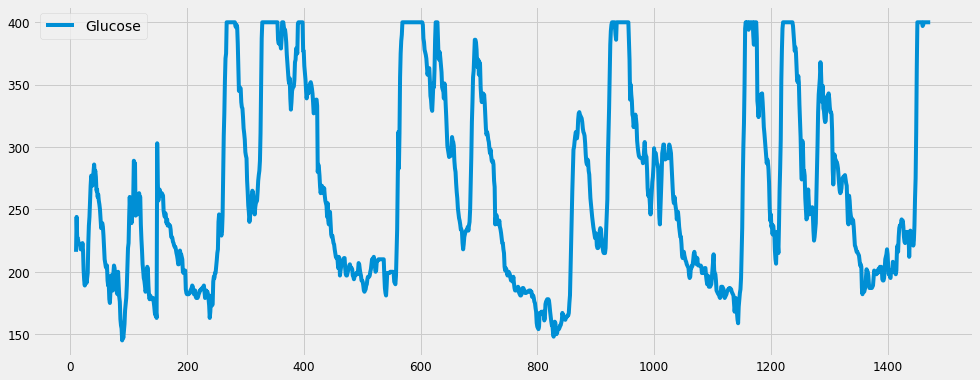

In [60]:
df.plot(figsize=(15,6))
plt.show()

In [61]:
from scipy import interpolate

#iy = spi.splev(df['Timestamp'],df['Glucose'])

#df['Glucose']=df['Glucose'].interpolate(method='linear',limit_direction='forward')
#df['Glucose'].interpolate(methodhod='polynomial',order=2)
#df['Glucose'].interpolate(method='pad',limit=
#x_ori=df[:,1]
#data = pd.read_csv('BG_sample2.csv',delimiter=',',dtype=np.float32,skiprows=2)
#f1 = interpolate.interp1d(df['Timestamp'],df['Glucose'])
df['Glucose']

10      216
11      244
12      227
13      227
14      224
       ... 
1469    400
1470    400
1471    400
1472    400
1473    400
Name: Glucose, Length: 1464, dtype: object

In [62]:
#import missingno as msno
#msno.matrix(df)

In [63]:
#x_new = np.linspace(0,len(df['Timestamp']),num=len(df['Timestamp']),endpoint=True)

In [64]:
#plt.plot(x_new,f1(x_new))

In [65]:
df.isnull().sum()

Timestamp    0
Event        0
Glucose      0
dtype: int64

In [66]:
df.head(30)

,Timestamp,Event,Glucose
10,2020-03-13T11:05:03,교정,216
11,2020-03-13T11:14:06,교정,244
12,2020-03-13T11:15:55,EGV,227
13,2020-03-13T11:20:50,EGV,227
14,2020-03-13T11:25:49,EGV,224
15,2020-03-13T11:30:49,EGV,223
16,2020-03-13T11:35:49,EGV,222
17,2020-03-13T11:40:50,EGV,222
18,2020-03-13T11:45:51,EGV,218
19,2020-03-13T11:50:49,EGV,218


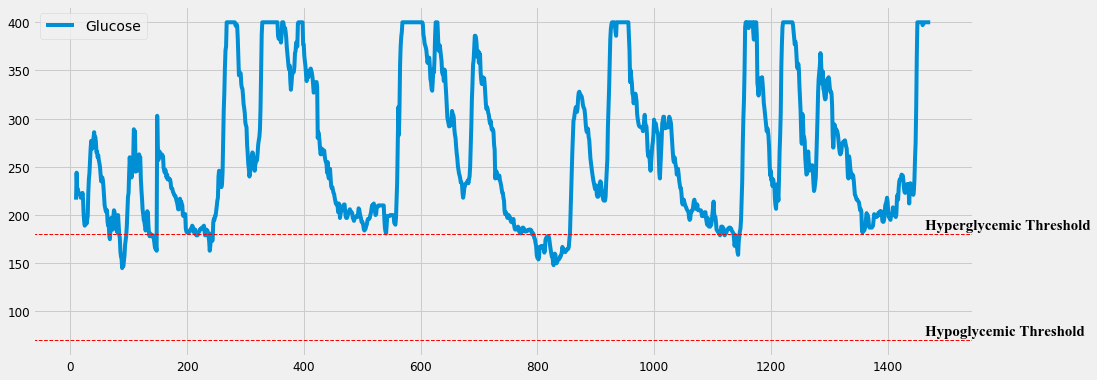

In [67]:
df.plot(figsize=(15,6))
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.text(len(df['Timestamp']),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
#y=70
#plt.plot(y,'b--',linestyles='--'),
#plt.hlines(70,linestyles='--')
plt.show()